In [2]:
import os
import pandas as pd
import requests


base_directory = "/camp/home/weie/lab_space_weie/training/TF-modisco/new_pos_only/modisco_output/report"
jaspar_base_url = "https://jaspar.uio.no/api/v1/matrix/"


def lookup_ma_code(ma_code):
    try:
        response = requests.get(f"{jaspar_base_url}{ma_code}/")
        if response.status_code == 200:
            data = response.json()
            return data.get('name')
        else:
            return None



def extract_and_lookup_ma_codes(df):
    ma_codes = set()
    columns = ['match0', 'qval0', 'match1', 'qval1', 'match2', 'qval2']

    for i in range(0, len(columns), 2):
        match_col = columns[i]
        qval_col = columns[i + 1]
        filtered = df[df[qval_col] < 0.2]

        ma_codes.update(filtered[match_col].dropna().unique())
    ma_to_tf = {ma_code: lookup_ma_code(ma_code) for ma_code in ma_codes}
    
    return ma_to_tf


def find_n_html_files(base_dir):
    n_html_files = []
    for root, dirs, files in os.walk(base_dir):
        for file in files:
            if file.endswith("n.html"):
                n_html_files.append(os.path.join(root, file))
    return n_html_files


def main():
    n_html_files = find_n_html_files(base_directory)
    all_ma_to_tf = {}

    for file_path in n_html_files:
        print(f"Processing file: {file_path}")
        try:
            df = pd.read_html(file_path)[0] 
            ma_to_tf_dict = extract_and_lookup_ma_codes(df)
            all_ma_to_tf.update(ma_to_tf_dict)
        except Exception as e:
            print(f"Error processing file {file_path}: {str(e)}")
    print(all_ma_to_tf)

if __name__ == "__main__":
    main()


Processing file: /camp/home/weie/lab_space_weie/training/TF-modisco/new_pos_only/modisco_output/report/report_WT_D7_pM_NFIAn/D7pMn.html
Processing file: /camp/home/weie/lab_space_weie/training/TF-modisco/new_pos_only/modisco_output/report/report_WT_D9_pM_NFIAn/D9pMn.html
Processing file: /camp/home/weie/lab_space_weie/training/TF-modisco/new_pos_only/modisco_output/report/report_WT_D7_p2_NFIAn/D7p2n.html
Processing file: /camp/home/weie/lab_space_weie/training/TF-modisco/new_pos_only/modisco_output/report/report_WT_D9_p1_NFIAn/D9p1n.html
Processing file: /camp/home/weie/lab_space_weie/training/TF-modisco/new_pos_only/modisco_output/report/report_WT_D5_p2_NFIAn/D5p2n.html
Processing file: /camp/home/weie/lab_space_weie/training/TF-modisco/new_pos_only/modisco_output/report/report_WT_D7_p1_NFIAn/D7p1n.html
Processing file: /camp/home/weie/lab_space_weie/training/TF-modisco/new_pos_only/modisco_output/report/report_WT_D11_p2_NFIAp/D11p2n.html
Processing file: /camp/home/weie/lab_space_wei

In [3]:

# Function to extract Day and Part from the filename
def extract_day_and_part(filename):
    # Assuming filenames are in the format "D5p1n.html", "D11pMn.html", etc.
    basename = os.path.basename(filename)
    day_part = basename.split('n')[0]  # Extracts "D5p1", "D11pM", etc.
    
    # Extract Day and Part
    day = ''.join([c for c in day_part if c.isdigit()])
    part = ''.join([c for c in day_part if not c.isdigit()])
    
    return day, part

# Function to recursively find all *n.html files in a directory
def find_n_html_files(base_dir):
    n_html_files = []
    for root, dirs, files in os.walk(base_dir):
        for file in files:
            if file.endswith("n.html"):
                n_html_files.append(os.path.join(root, file))
    return n_html_files

# Main script execution
def main():
    n_html_files = find_n_html_files(base_directory)
    combined_df = pd.DataFrame()

    for file_path in n_html_files:
        print(f"Processing file: {file_path}")
        try:
            df = pd.read_html(file_path)[0]  # Load the HTML file into a DataFrame
            
            # Extract Day and Part from the filename
            day, part = extract_day_and_part(file_path)
            
            # Add Day and Part columns to the DataFrame
            df['Day'] = day
            df['Part'] = part
            
            # Append to the combined DataFrame
            combined_df = pd.concat([combined_df, df], ignore_index=True)
        except Exception as e:
            print(f"Error processing file {file_path}: {str(e)}")
    
    # Save the combined DataFrame to a CSV file
    combined_csv_path = os.path.join(base_directory, 'combined_data.csv')
    combined_df.to_csv(combined_csv_path, index=False)
    print(f"Combined data saved to {combined_csv_path}")

if __name__ == "__main__":
    main()


Processing file: /camp/home/weie/lab_space_weie/training/TF-modisco/new_pos_only/modisco_output/report/report_WT_D7_pM_NFIAn/D7pMn.html
Processing file: /camp/home/weie/lab_space_weie/training/TF-modisco/new_pos_only/modisco_output/report/report_WT_D9_pM_NFIAn/D9pMn.html
Processing file: /camp/home/weie/lab_space_weie/training/TF-modisco/new_pos_only/modisco_output/report/report_WT_D7_p2_NFIAn/D7p2n.html
Processing file: /camp/home/weie/lab_space_weie/training/TF-modisco/new_pos_only/modisco_output/report/report_WT_D9_p1_NFIAn/D9p1n.html
Processing file: /camp/home/weie/lab_space_weie/training/TF-modisco/new_pos_only/modisco_output/report/report_WT_D5_p2_NFIAn/D5p2n.html
Processing file: /camp/home/weie/lab_space_weie/training/TF-modisco/new_pos_only/modisco_output/report/report_WT_D7_p1_NFIAn/D7p1n.html
Processing file: /camp/home/weie/lab_space_weie/training/TF-modisco/new_pos_only/modisco_output/report/report_WT_D11_p2_NFIAp/D11p2n.html
Processing file: /camp/home/weie/lab_space_wei

In [5]:
import pandas as pd

# Load the combined data CSV
combined_data_path = '/camp/home/weie/lab_space_weie/ipynb/combined_data.csv'
df = pd.read_csv(combined_data_path)

# Your existing dictionary with MA codes and transcription factor names
ma_to_tf={'MA1713.1': 'ZNF610', 'MA1559.1': 'SNAI3', 'MA1650.1': 'ZBTB14', 'MA1560.1': 'SOHLH2', 'MA1615.1': 'Plagl1', 'MA0663.1': 'MLX', 'MA0599.1': 'KLF5', 'MA1120.1': 'SOX13', 'MA1723.1': 'PRDM9', 'MA1558.1': 'SNAI1', 'MA1945.1': 'ETV5::FIGLA', 'MA1656.1': 'ZNF449', 'MA1966.1': 'TFAP4::ETV1', 'MA1653.1': 'ZNF148', 'MA1484.1': 'ETS2', 'MA0146.2': 'Zfx', 'MA0103.3': 'ZEB1', 'MA0506.2': 'Nrf1', 'MA1712.1': 'ZNF454', 'MA1961.1': 'PATZ1', 'MA1986.1': 'ZNF692', 'MA0514.2': 'Sox3', 'MA0692.1': 'TFEB', 'MA1513.1': 'KLF15', 'MA0867.2': 'SOX4', 'MA0831.3': 'TFE3', 'MA0163.1': 'PLAG1', 'MA1976.1': 'ZNF320', 'MA1930.1': 'CTCF', 'MA0515.1': 'Sox6', 'MA1929.1': 'CTCF', 'MA0741.1': 'KLF16', 'MA0759.2': 'ELK3', 'MA0076.2': 'ELK4', 'MA0079.5': 'SP1', 'MA1102.2': 'CTCFL', 'MA1962.1': 'POU2F1::SOX2', 'MA0685.2': 'SP4', 'MA1475.1': 'CREB3L4', 'MA1125.1': 'ZNF384', 'MA1512.1': 'KLF11', 'MA1127.1': 'FOSB::JUN', 'MA0597.2': 'THAP1', 'MA0139.1': 'CTCF', 'MA0750.2': 'ZBTB7A', 'MA1548.1': 'PLAGL2', 'MA1145.1': 'FOSL2::JUND', 'MA1648.1': 'TCF12', 'MA0743.2': 'SCRT1', 'MA1129.1': 'FOSL1::JUN', 'MA0763.1': 'ETV3', 'MA0764.3': 'ETV4', 'MA0502.2': 'NFYB', 'MA0475.2': 'FLI1', 'MA0516.3': 'SP2', 'MA0060.3': 'NFYA', 'MA1644.1': 'NFYC', 'MA0508.3': 'PRDM1', 'MA1136.1': 'FOSB::JUNB', 'MA1623.1': 'Stat2', 'MA1109.1': 'NEUROD1', 'MA0041.2': 'FOXD3', 'MA0481.3': 'FOXP1', 'MA0751.1': 'ZIC4', 'MA0036.3': 'GATA2', 'MA1721.1': 'ZNF93', 'MA0522.3': 'TCF3', 'MA0753.2': 'ZNF740', 'MA1982.1': 'ZNF574', 'MA0087.2': 'Sox5', 'MA1529.1': 'NHLH2', 'MA1112.2': 'NR4A1', 'MA1584.1': 'ZIC5', 'MA0830.2': 'TCF4', 'MA0077.1': 'SOX9', 'MA1522.1': 'MAZ', 'MA0636.1': 'BHLHE41', 'MA1631.1': 'ASCL1', 'MA1709.1': 'ZIM3', 'MA1965.1': 'SP5', 'MA1630.2': 'ZNF281', 'MA0080.6': 'Spi1', 'MA0081.2': 'SPIB', 'MA0073.1': 'RREB1', 'MA1627.1': 'Wt1', 'MA0039.4': 'KLF4', 'MA1565.1': 'TBX18', 'MA0149.1': 'EWSR1-FLI1', 'MA1989.1': 'Bcl11B', 'MA1107.2': 'KLF9', 'MA0679.2': 'ONECUT1', 'MA0851.1': 'Foxj3', 'MA1567.2': 'Tbx6', 'MA1981.1': 'ZNF530', 'MA0471.2': 'E2F6', 'MA0162.4': 'EGR1', 'MA0643.1': 'Esrrg', 'MA0798.3': 'RFX3', 'MA1724.1': 'Rfx6', 'MA0141.3': 'ESRRB', 'MA0799.2': 'RFX4', 'MA1111.1': 'NR2F2', 'MA0509.3': 'RFX1', 'MA0600.2': 'RFX2', 'MA1568.1': 'TCF21', 'MA1467.2': 'Atoh1', 'MA0742.2': 'KLF12', 'MA0681.2': 'PHOX2B', 'MA1511.2': 'KLF10', 'MA1978.1': 'ZNF354A', 'MA0614.1': 'Foxj2', 'MA0078.2': 'Sox17', 'MA1606.1': 'Foxf1', 'MA0803.1': 'TBX15', 'MA0869.2': 'Sox11', 'MA0840.1': 'Creb5', 'MA0505.2': 'Nr5A2', 'MA1638.1': 'HAND2', 'MA0510.2': 'RFX5', 'MA0526.4': 'USF2', 'MA0805.1': 'TBX1', 'MA0154.4': 'EBF1', 'MA1933.1': 'ELK1::SREBF2', 'MA1938.1': 'ERF::NHLH1', 'MA1997.1': 'Olig2', 'MA1655.1': 'ZNF341', 'MA1993.1': 'Neurod2', 'MA0633.2': 'Twist2', 'MA1564.1': 'SP9', 'MA0816.1': 'Ascl2', 'MA1100.2': 'ASCL1', 'MA1944.1': 'ETV5::DRGX', 'MA0048.2': 'NHLH1', 'MA0829.2': 'SREBF1', 'MA1941.1': 'ETV2::FIGLA', 'MA1131.1': 'FOSL2::JUN', 'MA1934.1': 'ERF::FIGLA', 'MA0521.2': 'Tcf12', 'MA1472.2': 'Bhlha15', 'MA1983.1': 'ZNF582', 'MA0747.1': 'SP8', 'MA0442.2': 'SOX10', 'MA1940.1': 'ETV2::DRGX'}

# Function to translate MA code into full name if qval < 0.2
def translate_ma_code(row, ma_column, qval_column):
    ma_code = row[ma_column]
    qval = row[qval_column]
    if qval < 0.2:
        return ma_to_tf.get(ma_code, ma_code)  # Return the full name if found, otherwise return the original code
    return None  # Return None if qval >= 0.2

# Apply the function to create new columns for the translated names
df['match0_full_name'] = df.apply(translate_ma_code, ma_column='match0', qval_column='qval0', axis=1)
df['match1_full_name'] = df.apply(translate_ma_code, ma_column='match1', qval_column='qval1', axis=1)
df['match2_full_name'] = df.apply(translate_ma_code, ma_column='match2', qval_column='qval2', axis=1)

# Save the updated DataFrame to a new CSV file
output_path = '/camp/home/weie/lab_space_weie/ipynb/combined_data_with_full_names.csv'
df.to_csv(output_path, index=False)

print(f"Updated data saved to {output_path}")

Updated data saved to /camp/home/weie/lab_space_weie/ipynb/combined_data_with_full_names.csv


In [7]:
import pandas as pd

# Load the combined data Excel file
combined_data_path = '/camp/home/weie/lab_space_weie/ipynb/combined_data_with_full_names.csv'
df = pd.read_csv(combined_data_path)

# Count the number of positive and negative patterns in the dataset
positive_patterns_count = df[df['pattern'].str.contains("pos_patterns", na=False)].shape[0]
negative_patterns_count = df[df['pattern'].str.contains("neg_patterns", na=False)].shape[0]

positive_patterns_count, negative_patterns_count

(138, 138)

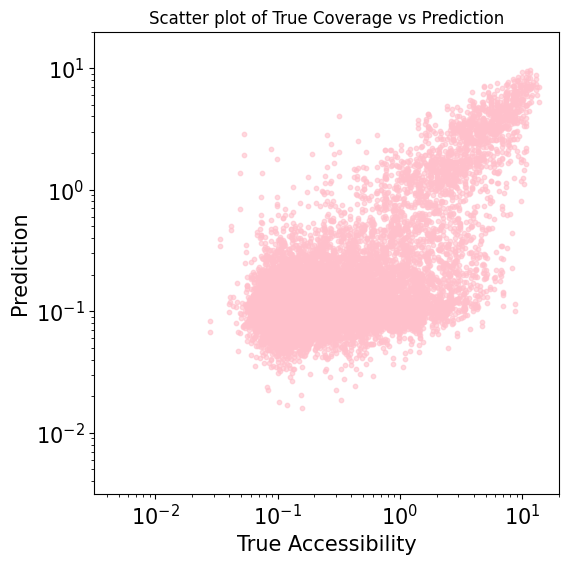

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the data
data = pd.read_csv('/camp/home/weie/lab_space_weie/macs2/training_files/fully_cleaned/predictions/D5_p1_NFIAn/D5_p1_NFIAn_pos_predictions.csv')
#neg_data = pd.read_csv('/camp/home/weie/lab_space_weie/macs2/training_files/fully_cleaned/predictions/D5_p1_NFIAn/D9_p1_NFIAn_neg_predictions.csv')

# Add a column to distinguish between positive and negative samples
pos_data['label'] = 'pos'
#

# Combine the data
data = pd.concat([pos_data])

# Shuffle the data to ensure random ordering
data = data.sample(frac=1).reset_index(drop=True)

# Define colors
colors = {'pos': 'pink'}

# Plot the data
plt.figure(figsize=(6, 6))
for label, color in colors.items():
    subset = data[data['label'] == label]
    plt.scatter(subset['True Label'], subset['Prediction'], c=color, label=label, alpha=0.6, s=10)

plt.xlabel('True Accessibility',fontsize=15)
plt.ylabel('Prediction', fontsize=15)
plt.yscale('log')
plt.xscale('log')
plt.xlim(10**-2.5, 20)
plt.ylim(10**-2.5, 20)
plt.title('Scatter plot of True Coverage vs Prediction')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.savefig('/camp/home/weie/lab_space_weie/ipynb/newpos-viva.png', dpi=400)
plt.show()